In [1]:
import requests
import pandas as pd
import json
from cred import credentials
from request_api import get_genesis_api
from sql import get_data

In [2]:
cinema = get_data('SELECT * FROM cinema_formatted')
cinema

/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bundesland,year,Bruttoeinnahmen_aus_dem_Filmbesuch_Mill._EUR,Durchschnittlicher_Kino-Eintrittspreis_EUR,Filmbesuche_Mill.,Filmbesuche_je_Einwohner_Anzahl,Kinos_Anzahl,Leinwände_Anzahl,Sitzplätze_der_Kinos_Anzahl
0,Baden-Württemberg,2000,103.2,5.57,18.5,1.8,258.0,626.0,110626.0
1,Baden-Württemberg,2001,127.2,5.67,22.4,2.1,249.0,621.0,110251.0
2,Baden-Württemberg,2002,125.3,5.89,21.3,2.0,252.0,629.0,109265.0
3,Baden-Württemberg,2003,112.1,5.79,19.3,1.8,262.0,656.0,111429.0
4,Baden-Württemberg,2004,120.6,5.81,20.8,1.9,260.0,656.0,112175.0
...,...,...,...,...,...,...,...,...,...
331,Thüringen,2016,19.6,8.19,2.4,1.1,49.0,138.0,18669.0
332,Thüringen,2017,20.2,8.42,2.4,1.1,47.0,136.0,18543.0
333,Thüringen,2018,17.5,8.24,2.1,1.0,48.0,138.0,18543.0
334,Thüringen,2019,19.9,8.47,2.4,1.1,48.0,138.0,18288.0


In [ ]:
cinema.drop(columns=['Bruttoeinnahmen_aus_dem_Filmbesuch_Mill._EUR', 'Durchschnittlicher_Kino-Eintrittspreis_EUR', 'Filmbesuche_Mill.', 'Filmbesuche_je_Einwohner_Anzahl'], inplace=True)
cinema


In [14]:
cinema.drop(columns='Leinwände_Anzahl', inplace=True)

In [28]:
cinema.rename(columns={'bundesland':'state','Sitzplätze_der_Kinos_Anzahl':'seats_num', 'Kinos_Anzahl': 'kinos_num'}, inplace=True)
cinema

,state,year,kinos_num,seats_num
0,Baden-Württemberg,2000,258.0,110626.0
1,Baden-Württemberg,2001,249.0,110251.0
2,Baden-Württemberg,2002,252.0,109265.0
3,Baden-Württemberg,2003,262.0,111429.0
4,Baden-Württemberg,2004,260.0,112175.0
...,...,...,...,...
331,Thüringen,2016,49.0,18669.0
332,Thüringen,2017,47.0,18543.0
333,Thüringen,2018,48.0,18543.0
334,Thüringen,2019,48.0,18288.0


In [21]:
museum = get_data('SELECT * FROM museum_formatted')
museum.drop(columns=['Ausstellungen_Anzahl'], inplace=True)


/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bundesland,year,Museen_Anzahl,Museumsbesuche_1000
0,Baden-Württemberg,2002,830,14110
1,Baden-Württemberg,2003,825,12990
2,Baden-Württemberg,2004,821,13600
3,Baden-Württemberg,2005,819,13711
4,Baden-Württemberg,2006,784,14005
...,...,...,...,...
283,Thüringen,2015,213,4344
284,Thüringen,2016,209,4477
285,Thüringen,2017,196,4424
286,Thüringen,2018,196,3995


In [29]:
museum.rename(columns={'bundesland':'state'}, inplace=True)

In [23]:
genehmigung = pd.read_csv('data/genehmigung.csv', index_col=0)
genehmigung_wg = genehmigung.drop(columns=['Nwohngebäude_num', 'area_NWg', 'rooms_NWg'])
genehmigung_wg

,bundesland,year,Wohngebäude_num,area_Wg,rooms_Wg
0,Baden-Württemberg,2008,20181,902,125979
1,Baden-Württemberg,2009,20243,935,126624
2,Baden-Württemberg,2010,21441,1005,137168
3,Baden-Württemberg,2011,23868,1211,155733
4,Baden-Württemberg,2012,23118,1257,157525
...,...,...,...,...,...
219,Thüringen,2017,3736,18,22002
220,Thüringen,2018,3648,58,21541
221,Thüringen,2019,3493,41,21262
222,Thüringen,2020,3795,58,23319


In [30]:
genehmigung_wg.rename(columns={'bundesland':'state'}, inplace=True)

In [6]:
apartments = get_data('SELECT * FROM apartments_bundesland_rooms')
apartments

/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bundesland_index,bundesland,1 room,2 rooms,3 rooms,4 rooms,5 rooms,6 rooms,7 or more rooms,Total,year
0,0,Baden-Württemberg,115753,231880,775499,1290496,932786,533914,523079,4403407,1995
1,1,Bayern,166441,325148,997947,1347338,1012566,643603,707165,5200208,1995
2,2,Berlin,24299,257454,649536,537402,213152,57915,30588,1770346,1995
3,3,Brandenburg,7293,76754,263661,418162,210730,80832,43997,1101429,1995
4,4,Bremen,8629,18454,87926,117815,62114,25362,16122,336422,1995
...,...,...,...,...,...,...,...,...,...,...,...
411,11,Saarland,9930,29510,83830,119857,94375,80559,102782,520843,2020
412,12,Sachsen,79132,249141,667370,712123,354111,183335,138520,2383732,2020
413,13,Sachsen-Anhalt,33256,117815,318966,387760,225318,118669,92996,1294780,2020
414,14,Schleswig-Holstein,39230,137505,312431,360467,297722,190180,179697,1517232,2020


In [31]:
apartments.rename(columns={'bundesland':'state'}, inplace=True)

In [7]:
apartments.columns

Index(['bundesland_index', 'bundesland', '1 room', '2 rooms', '3 rooms',
       '4 rooms', '5 rooms', '6 rooms', '7 or more rooms', 'Total', 'year'],
      dtype='object')

In [9]:
apartments.drop(columns=['bundesland_index', '1 room', '2 rooms', '3 rooms',
       '4 rooms', '5 rooms', '6 rooms', '7 or more rooms'], inplace=True)

In [236]:
apartments

,state,Total,year
0,Baden-Württemberg,4403407,1995
1,Bayern,5200208,1995
2,Berlin,1770346,1995
3,Brandenburg,1101429,1995
4,Bremen,336422,1995
...,...,...,...
411,Saarland,520843,2020
412,Sachsen,2383732,2020
413,Sachsen-Anhalt,1294780,2020
414,Schleswig-Holstein,1517232,2020


In [119]:
restaurants = pd.read_csv('data/restaurants_per_bundesland.csv', index_col=0)
restaurants.drop(columns='avg_rating', inplace=True)


In [32]:
restaurants.rename(columns={'bundesland':'state'}, inplace=True)

In [258]:
population = pd.read_csv('data/population_avg_age_with_country.csv', index_col=0)
population

,year,state,age_avg,total_population,country
0,2000,Baden-Württemberg,39.681041,10524415,Germany
1,2000,Bayern,40.042644,12230255,Germany
2,2000,Berlin,40.522362,3382169,Germany
3,2000,Brandenburg,40.749223,2601962,Germany
4,2000,Bremen,42.060658,660225,Germany
...,...,...,...,...,...
811,2050,Saarland,47.602190,822000,Germany
812,2050,Sachsen,46.823152,3585000,Germany
813,2050,Sachsen-Anhalt,48.502364,1692000,Germany
814,2050,Schleswig-Holstein,48.137918,2661000,Germany


In [273]:
pop_2020 = population.query('year == 2020')
pop_2040 = population.query('year == 2040')

In [274]:
pop = pop_2020.merge(pop_2040, on='state')
pop

,year_x,state,age_avg_x,total_population_x,country_x,year_y,age_avg_y,total_population_y,country_y
0,2020,Baden-Württemberg,43.240650,11103043,Germany,2040,45.635730,11184000,Germany
1,2020,Bayern,43.488237,13140183,Germany,2040,45.982222,13162000,Germany
2,2020,Berlin,42.149704,3664088,Germany,2040,44.047507,3831000,Germany
3,2020,Brandenburg,46.722180,2531071,Germany,2040,49.364548,2392000,Germany
4,2020,Bremen,43.143783,680130,Germany,2040,45.257230,657000,Germany
5,2020,Hamburg,41.608811,1852478,Germany,2040,43.469503,1951000,Germany
6,2020,Hessen,43.518179,6293154,Germany,2040,45.744900,6225000,Germany
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,2040,48.319425,1462000,Germany
8,2020,Niedersachsen,44.270348,8003421,Germany,2040,46.183589,7702000,Germany
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,2040,45.695462,17190000,Germany


In [275]:
pop['pop_diff'] = (pop['total_population_y'] - pop['total_population_x']) / pop['total_population_x']
pop

,year_x,state,age_avg_x,total_population_x,country_x,year_y,age_avg_y,total_population_y,country_y,pop_diff
0,2020,Baden-Württemberg,43.240650,11103043,Germany,2040,45.635730,11184000,Germany,0.007291
1,2020,Bayern,43.488237,13140183,Germany,2040,45.982222,13162000,Germany,0.001660
2,2020,Berlin,42.149704,3664088,Germany,2040,44.047507,3831000,Germany,0.045553
3,2020,Brandenburg,46.722180,2531071,Germany,2040,49.364548,2392000,Germany,-0.054946
4,2020,Bremen,43.143783,680130,Germany,2040,45.257230,657000,Germany,-0.034008
5,2020,Hamburg,41.608811,1852478,Germany,2040,43.469503,1951000,Germany,0.053184
6,2020,Hessen,43.518179,6293154,Germany,2040,45.744900,6225000,Germany,-0.010830
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,2040,48.319425,1462000,Germany,-0.092362
8,2020,Niedersachsen,44.270348,8003421,Germany,2040,46.183589,7702000,Germany,-0.037662
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,2040,45.695462,17190000,Germany,-0.041035


<AxesSubplot:xlabel='state'>

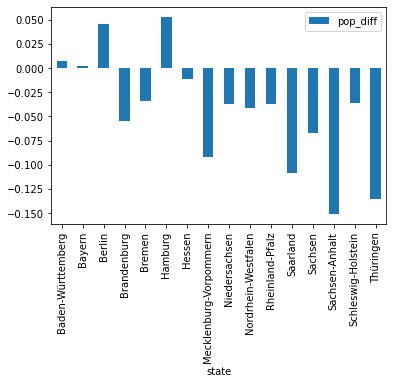

In [276]:
pop.plot(kind='bar', x='state', y='pop_diff')

In [277]:
pop = pop[['state', 'pop_diff']]
pop

,state,pop_diff
0,Baden-Württemberg,0.007291
1,Bayern,0.001660
2,Berlin,0.045553
3,Brandenburg,-0.054946
4,Bremen,-0.034008
5,Hamburg,0.053184
6,Hessen,-0.010830
7,Mecklenburg-Vorpommern,-0.092362
8,Niedersachsen,-0.037662
9,Nordrhein-Westfalen,-0.041035


In [41]:
pop_genehmigung = population.merge(genehmigung_wg, on=['state', 'year'])

In [42]:
pop_genehmigung

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg
0,2008,Baden-Württemberg,41.719779,10749506,Germany,20181,902,125979
1,2008,Bayern,41.929931,12519728,Germany,25024,916,168757
2,2008,Berlin,42.153147,3431675,Germany,2892,24,27210
3,2008,Brandenburg,44.414482,2522493,Germany,5978,35,31940
4,2008,Bremen,43.165608,661866,Germany,705,10,4380
...,...,...,...,...,...,...,...,...
219,2021,Saarland,45.171254,981000,Germany,1846,38,10837
220,2021,Sachsen,45.463331,4077000,Germany,8253,125,56177
221,2021,Sachsen-Anhalt,46.907331,2169000,Germany,4494,21,25106
222,2021,Schleswig-Holstein,44.744433,2919000,Germany,9764,231,60711


In [43]:
pop_genehmigung['new_building)_per_resident'] = pop_genehmigung['Wohngebäude_num']/pop_genehmigung['total_population']
pop_genehmigung

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building)_per_resident
0,2008,Baden-Württemberg,41.719779,10749506,Germany,20181,902,125979,0.001877
1,2008,Bayern,41.929931,12519728,Germany,25024,916,168757,0.001999
2,2008,Berlin,42.153147,3431675,Germany,2892,24,27210,0.000843
3,2008,Brandenburg,44.414482,2522493,Germany,5978,35,31940,0.002370
4,2008,Bremen,43.165608,661866,Germany,705,10,4380,0.001065
...,...,...,...,...,...,...,...,...,...
219,2021,Saarland,45.171254,981000,Germany,1846,38,10837,0.001882
220,2021,Sachsen,45.463331,4077000,Germany,8253,125,56177,0.002024
221,2021,Sachsen-Anhalt,46.907331,2169000,Germany,4494,21,25106,0.002072
222,2021,Schleswig-Holstein,44.744433,2919000,Germany,9764,231,60711,0.003345


In [44]:
pop_genehmigung['new_rooms_per_resident'] = pop_genehmigung['rooms_Wg']/pop_genehmigung['total_population']
pop_genehmigung

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building)_per_resident,new_rooms_per_resident
0,2008,Baden-Württemberg,41.719779,10749506,Germany,20181,902,125979,0.001877,0.011720
1,2008,Bayern,41.929931,12519728,Germany,25024,916,168757,0.001999,0.013479
2,2008,Berlin,42.153147,3431675,Germany,2892,24,27210,0.000843,0.007929
3,2008,Brandenburg,44.414482,2522493,Germany,5978,35,31940,0.002370,0.012662
4,2008,Bremen,43.165608,661866,Germany,705,10,4380,0.001065,0.006618
...,...,...,...,...,...,...,...,...,...,...
219,2021,Saarland,45.171254,981000,Germany,1846,38,10837,0.001882,0.011047
220,2021,Sachsen,45.463331,4077000,Germany,8253,125,56177,0.002024,0.013779
221,2021,Sachsen-Anhalt,46.907331,2169000,Germany,4494,21,25106,0.002072,0.011575
222,2021,Schleswig-Holstein,44.744433,2919000,Germany,9764,231,60711,0.003345,0.020799


In [205]:
pop_genehmigung.query('state == "Sachsen-Anhalt"')

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building_per_resident,new_rooms_per_resident
13,2008,Sachsen-Anhalt,45.350794,2381872,Germany,2806,-57,13439,0.001178,0.005642
29,2009,Sachsen-Anhalt,45.704510,2356219,Germany,2760,-36,11369,0.001171,0.004825
45,2010,Sachsen-Anhalt,46.011604,2335006,Germany,2867,-41,9345,0.001228,0.004002
61,2011,Sachsen-Anhalt,46.398131,2276736,Germany,3105,-31,14350,0.001364,0.006303
77,2012,Sachsen-Anhalt,46.652724,2259393,Germany,2988,-38,12834,0.001322,0.005680
93,2013,Sachsen-Anhalt,46.859157,2244577,Germany,3113,-37,13072,0.001387,0.005824
109,2014,Sachsen-Anhalt,47.007135,2235548,Germany,3387,-5,16306,0.001515,0.007294
125,2015,Sachsen-Anhalt,46.902986,2245470,Germany,3736,-9,19455,0.001664,0.008664
141,2016,Sachsen-Anhalt,47.002557,2236252,Germany,3802,-18,21317,0.001700,0.009532
157,2017,Sachsen-Anhalt,47.124954,2223081,Germany,3648,-44,20810,0.001641,0.009361


In [45]:
pop_genehmigung.rename(columns={'new_building)_per_resident':'new_building_per_resident'}, inplace=True)

In [49]:
pop_genehmigung_2020 = pop_genehmigung.query('year == 2020')

In [52]:
min_2020 = pop_genehmigung_2020.min()
min_2020

year                                      2020
state                        Baden-Württemberg
age_avg                              41.608811
total_population                        680130
country                                Germany
Wohngebäude_num                            778
area_Wg                                     -1
rooms_Wg                                  6223
new_building_per_resident              0.00083
new_rooms_per_resident                 0.00915
dtype: object

In [55]:
max_2020 = pop_genehmigung_2020.max()
max_2020

year                              2020
state                        Thüringen
age_avg                      47.536632
total_population              17925570
country                        Germany
Wohngebäude_num                  40427
area_Wg                           1948
rooms_Wg                        283342
new_building_per_resident     0.003254
new_rooms_per_resident        0.021563
dtype: object

In [ ]:
# columns = ['new_building_per_resident', 'new_rooms_per_resident']
# for col in columns:
#     pop_genehmigung_2020['scaled_%s' % col] = pop_genehmigung_2020[col].map(lambda x: (x - min_2020[col]) / (max_2020[col] - min_2020[col]))
# pop_genehmigung_2020

In [65]:
pop_g_c = pop_genehmigung_2020.merge(cinema.query('year == 2020'))
pop_g_c

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building_per_resident,new_rooms_per_resident,scaled_new_building_per_resident,scaled_new_rooms_per_resident,kinos_num,seats_num
0,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,0.002396,0.016828,0.645766,0.618560,252.0,100970.0
1,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,0.003077,0.021563,0.926662,1.000000,284.0,125431.0
2,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,0.000830,0.014549,0.000000,0.434919,95.0,48373.0
3,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,0.003254,0.021181,1.000000,0.969237,64.0,24371.0
4,2020,Bremen,43.143783,680130,Germany,778,35,6223,0.001144,0.009150,0.129300,0.000000,12.0,11791.0
5,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,0.001199,0.016786,0.152006,0.615183,33.0,20595.0
6,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,0.001944,0.015521,0.459598,0.513223,128.0,56589.0
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,0.002144,0.015322,0.542035,0.497267,79.0,19778.0
8,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,0.002752,0.019383,0.792674,0.824418,177.0,69454.0
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,0.001693,0.012755,0.355932,0.290452,273.0,171030.0


In [ ]:
pop_g_c_m = pop_g_c.merge(museum.query('year == 2019')[['Museen_Anzahl','state']], on='state')

In [82]:
pop_g_c_m_a = pop_g_c_m.merge(apartments.query('year == 2020')).rename(columns={'Wohngebäude_num':'new_building','Museen_Anzahl':'museum', 'kinos_num': 'kino','seats_num':'kino_seat','Total':'apartment'})


In [83]:
pop_g_c_m_a

,year,state,age_avg,total_population,country,new_building,area_Wg,rooms_Wg,kino,kino_seat,museum,apartment
0,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,252.0,100970.0,841,5373419
1,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,284.0,125431.0,590,6549811
2,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,95.0,48373.0,147,1982825
3,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,64.0,24371.0,225,1348702
4,2020,Bremen,43.143783,680130,Germany,778,35,6223,12.0,11791.0,27,363969
5,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,33.0,20595.0,40,976709
6,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,128.0,56589.0,304,3081216
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,79.0,19778.0,146,921785
8,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,177.0,69454.0,492,4057466
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,273.0,171030.0,557,9108208


In [121]:
restaurants.rename(columns={'bundesland':'state'},inplace=True)

In [123]:
restaurants.sort_values(by='state', inplace=True)
restaurants['state'] = restaurants['state'].map(states_map)
# restaurants.drop(columns='bundesland', inplace=True)

In [124]:
restaurants

,state,year,rest_num
0,Baden-Württemberg,2020,16236
1,Bayern,2020,21531
2,Berlin,2020,7217
3,Brandenburg,2020,2378
4,Hamburg,2020,3625
5,Hessen,2020,9845
6,Niedersachsen,2020,9232
7,Mecklenburg-Vorpommern,2020,2634
8,Nordrhein-Westfalen,2020,21116
9,Rheinland-Pfalz,2020,6651


In [113]:
states_en = [
    'Baden-Württemberg',
    'Bayern',
    'Berlin',
    'Brandenburg',
    'Hamburg',
    'Hessen',
    'Niedersachsen',
    'Mecklenburg-Vorpommern',
    'Nordrhein-Westfalen',
    'Rheinland-Pfalz',
    'Saarland',
    'Sachsen',
    'Sachsen-Anhalt',
    'Schleswig-Holstein',
    'Bremen',
    'Thüringen'
]
states_map = dict(zip(list(restaurants.state), states_en))
states_map

{'Baden-Wurttemberg': 'Baden-Württemberg',
 'Bavaria': 'Bayern',
 'Berlin': 'Berlin',
 'Brandenburg': 'Brandenburg',
 'Hamburg': 'Hamburg',
 'Hesse': 'Hessen',
 'Lower Saxony': 'Niedersachsen',
 'Mecklenburg-West Pomerania': 'Mecklenburg-Vorpommern',
 'North Rhine-Westphalia': 'Nordrhein-Westfalen',
 'Rhineland-Palatinate': 'Rheinland-Pfalz',
 'Saarland': 'Saarland',
 'Saxony': 'Sachsen',
 'Saxony-Anhalt': 'Sachsen-Anhalt',
 'Schleswig-Holstein': 'Schleswig-Holstein',
 'State of Bremen': 'Bremen',
 'Thuringia': 'Thüringen'}

In [125]:
result = pop_g_c_m_a.merge(restaurants)
# result.drop(columns='avg_rating', inplace=True)

In [141]:
result.max()

year                              2020
state                        Thüringen
age_avg                      47.536632
total_population              17925570
country                        Germany
new_building                     40427
area_Wg                           1948
rooms_Wg                        283342
kino                             284.0
kino_seat                     171030.0
museum                             841
apartment                      9108208
restaurant                       21531
new_building_per_resident     0.003254
area_Wg_per_resident          0.000148
rooms_Wg_per_resident         0.021563
kino_per_resident             0.000049
kino_seat_per_resident        0.017336
museum_per_resident           0.000091
apartment_per_resident        0.593749
restaurant_per_resident        0.00197
scaled_new_building                1.0
scaled_area_Wg                     1.0
scaled_rooms_Wg                    1.0
scaled_kino                        1.0
scaled_kino_seat         

In [160]:
result.rename(columns={'area_Wg':'area_new_b', 'rooms_Wg':'rooms_new_b', 'kino': 'cinema', 'kino_seat':'cinema_seat'}, inplace=True)

In [184]:
unemployment = get_data('SELECT * FROM unemployment_rate_2000_2021')
unemployment


/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bundesland,year,unemployment_rate
0,Baden-Württemberg,2000,5.4
1,Baden-Württemberg,2001,4.9
2,Baden-Württemberg,2002,5.4
3,Baden-Württemberg,2003,6.2
4,Baden-Württemberg,2004,6.2
...,...,...,...
347,Thüringen,2017,6.1
348,Thüringen,2018,5.5
349,Thüringen,2019,5.3
350,Thüringen,2020,6.0


In [188]:
unemployment.rename(columns={'bundesland':'state'}, inplace=True)

In [198]:
result_3 = unemployment.query('year == 2020').merge(result)
result_3

,state,year,unemployment_rate,age_avg,total_population,country,new_building,area_new_b,rooms_new_b,cinema,...,scaled_age_avg,scaled_new_building,scaled_rooms_new_b,scaled_area_new_b,scaled_cinema,scaled_cinema_seat,scaled_museum,scaled_apartment,scaled_restaurant,score
0,Baden-Württemberg,2020,4.1,43.240650,11103043,Germany,26600,1402,186843,252.0,...,0.275285,0.645766,0.618560,0.852220,0.220814,0.142081,0.784282,0.000000,0.556773,4.095780
1,Bayern,2020,3.6,43.488237,13140183,Germany,40427,1948,283342,284.0,...,0.317052,0.926662,1.000000,1.000000,0.188775,0.189097,0.337564,0.132047,0.710754,4.801950
2,Berlin,2020,9.7,42.149704,3664088,Germany,3043,156,53307,95.0,...,0.091246,0.000000,0.434919,0.289389,0.316358,0.569664,0.268316,0.520919,1.000000,3.490813
3,Brandenburg,2020,6.2,46.722180,2531071,Germany,8237,131,53611,64.0,...,0.862605,1.000000,0.969237,0.351131,0.297385,0.197749,0.974735,0.445386,0.100073,5.198301
4,Bremen,2020,11.2,43.143783,680130,Germany,778,35,6223,12.0,...,0.258944,0.129300,0.000000,0.349140,0.071390,1.000000,0.262221,0.466226,0.643403,3.180624
5,Hamburg,2020,7.6,41.608811,1852478,Germany,2221,139,31096,33.0,...,0.000000,0.152006,0.615183,0.507667,0.076425,0.352711,0.000000,0.394256,0.988801,3.087049
6,Hessen,2020,5.4,43.518179,6293154,Germany,12237,494,97673,128.0,...,0.322103,0.459598,0.513223,0.530957,0.151114,0.131490,0.386893,0.051506,0.645965,3.192848
7,Mecklenburg-Vorpommern,2020,7.8,46.846078,1610774,Germany,3454,68,24681,79.0,...,0.883506,0.542035,0.497267,0.286971,1.000000,0.473557,1.000000,0.804288,0.707851,6.195475
8,Niedersachsen,2020,5.8,44.270348,8003421,Germany,22024,714,155134,177.0,...,0.448991,0.792674,0.824418,0.603004,0.203634,0.098796,0.577593,0.209557,0.287010,4.045675
9,Nordrhein-Westfalen,2020,7.5,43.759486,17925570,Germany,30352,821,228644,273.0,...,0.362810,0.355932,0.290452,0.311077,0.000000,0.188630,0.137301,0.219996,0.308391,2.174590


In [208]:
living_space = pd.read_csv('data/kreise_living_space.csv',index_col=0)

In [328]:
result_3 = pd.read_csv('scaled_all_merged.csv', index_col=0)
result_3

,state,year,unemployment_rate,age_avg,total_population,country,new_building,area_new_b,rooms_new_b,cinema,...,scaled_restaurant,score,scaled_unemployment_rate,scaled_employment_rate,number_of_buildings,living_space_1000qm,number_of_buildings_per_resident,living_space_1000qm_per_resident,scaled_number_of_buildings,scaled_living_space_1000qm
0,Baden-Württemberg,2020,4.1,43.240650,11103043,Germany,26600,1402,186843,252.0,...,0.556773,5.780873,0.065789,0.934211,2456160.0,499173.0,0.221215,0.044958,0.504336,0.246546
1,Bayern,2020,3.6,43.488237,13140183,Germany,40427,1948,283342,284.0,...,0.710754,6.699326,0.000000,1.000000,3112961.0,618336.5,0.236904,0.047057,0.564712,0.332664
2,Berlin,2020,9.7,42.149704,3664088,Germany,3043,156,53307,95.0,...,1.000000,3.688181,0.802632,0.197368,330356.0,142715.9,0.090160,0.038950,0.000000,0.000000
3,Brandenburg,2020,6.2,46.722180,2531071,Germany,8237,131,53611,64.0,...,0.100073,6.781587,0.342105,0.657895,683019.0,113011.1,0.269854,0.044650,0.691512,0.233879
4,Bremen,2020,11.2,43.143783,680130,Germany,778,35,6223,12.0,...,0.643403,3.753479,1.000000,0.000000,140872.0,28525.4,0.207125,0.041941,0.450114,0.122741
5,Hamburg,2020,7.6,41.608811,1852478,Germany,2221,139,31096,33.0,...,0.988801,3.763055,0.526316,0.473684,256273.0,72917.3,0.138341,0.039362,0.185411,0.016911
6,Hessen,2020,5.4,43.518179,6293154,Germany,12237,494,97673,128.0,...,0.645965,4.749674,0.236842,0.763158,1405221.0,288264.1,0.223294,0.045806,0.512335,0.281333
7,Mecklenburg-Vorpommern,2020,7.8,46.846078,1610774,Germany,3454,68,24681,79.0,...,0.707851,7.487184,0.552632,0.447368,401211.0,71876.9,0.249080,0.044623,0.611567,0.232773
8,Niedersachsen,2020,5.8,44.270348,8003421,Germany,22024,714,155134,177.0,...,0.287010,6.756201,0.289474,0.710526,2801326.0,506775.4,0.350016,0.063320,1.000000,1.000000
9,Nordrhein-Westfalen,2020,7.5,43.759486,17925570,Germany,30352,821,228644,273.0,...,0.308391,3.419062,0.513158,0.486842,3957773.0,809565.1,0.220789,0.045163,0.502697,0.254932


In [209]:
result_3 = result_3.merge(living_space)
result_3

,state,year,unemployment_rate,age_avg,total_population,country,new_building,area_new_b,rooms_new_b,cinema,...,scaled_cinema,scaled_cinema_seat,scaled_museum,scaled_apartment,scaled_restaurant,score,scaled_unemployment_rate,scaled_employment_rate,number_of_buildings,living_space_1000qm
0,Baden-Württemberg,2020,4.1,43.240650,11103043,Germany,26600,1402,186843,252.0,...,0.220814,0.142081,0.784282,0.000000,0.556773,5.029991,0.065789,0.934211,2456160.0,499173.0
1,Bayern,2020,3.6,43.488237,13140183,Germany,40427,1948,283342,284.0,...,0.188775,0.189097,0.337564,0.132047,0.710754,5.801950,0.000000,1.000000,3112961.0,618336.5
2,Berlin,2020,9.7,42.149704,3664088,Germany,3043,156,53307,95.0,...,0.316358,0.569664,0.268316,0.520919,1.000000,3.688181,0.802632,0.197368,330356.0,142715.9
3,Brandenburg,2020,6.2,46.722180,2531071,Germany,8237,131,53611,64.0,...,0.297385,0.197749,0.974735,0.445386,0.100073,5.856196,0.342105,0.657895,683019.0,113011.1
4,Bremen,2020,11.2,43.143783,680130,Germany,778,35,6223,12.0,...,0.071390,1.000000,0.262221,0.466226,0.643403,3.180624,1.000000,0.000000,140872.0,28525.4
5,Hamburg,2020,7.6,41.608811,1852478,Germany,2221,139,31096,33.0,...,0.076425,0.352711,0.000000,0.394256,0.988801,3.560733,0.526316,0.473684,256273.0,72917.3
6,Hessen,2020,5.4,43.518179,6293154,Germany,12237,494,97673,128.0,...,0.151114,0.131490,0.386893,0.051506,0.645965,3.956006,0.236842,0.763158,1405221.0,288264.1
7,Mecklenburg-Vorpommern,2020,7.8,46.846078,1610774,Germany,3454,68,24681,79.0,...,1.000000,0.473557,1.000000,0.804288,0.707851,6.642844,0.552632,0.447368,401211.0,71876.9
8,Niedersachsen,2020,5.8,44.270348,8003421,Germany,22024,714,155134,177.0,...,0.203634,0.098796,0.577593,0.209557,0.287010,4.756201,0.289474,0.710526,2801326.0,506775.4
9,Nordrhein-Westfalen,2020,7.5,43.759486,17925570,Germany,30352,821,228644,273.0,...,0.000000,0.188630,0.137301,0.219996,0.308391,2.661432,0.513158,0.486842,3957773.0,809565.1


In [271]:
result_3

,state,pop_diff,year,unemployment_rate,age_avg,total_population,country,new_building,area_new_b,rooms_new_b,...,score,scaled_unemployment_rate,scaled_employment_rate,number_of_buildings,living_space_1000qm,number_of_buildings_per_resident,living_space_1000qm_per_resident,scaled_number_of_buildings,scaled_living_space_1000qm,scaled_pop_diff
0,Baden-Württemberg,-0.007239,2020,4.1,43.240650,11103043,Germany,26600,1402,186843,...,5.970102,0.065789,0.934211,2456160.0,499173.0,0.221215,0.044958,0.504336,0.246546,0.189229
1,Bayern,-0.001658,2020,3.6,43.488237,13140183,Germany,40427,1948,283342,...,6.912968,0.000000,1.000000,3112961.0,618336.5,0.236904,0.047057,0.564712,0.332664,0.213642
2,Berlin,-0.043569,2020,9.7,42.149704,3664088,Germany,3043,156,53307,...,3.718492,0.802632,0.197368,330356.0,142715.9,0.090160,0.038950,0.000000,0.000000,0.030311
3,Brandenburg,0.058140,2020,6.2,46.722180,2531071,Germany,8237,131,53611,...,7.256800,0.342105,0.657895,683019.0,113011.1,0.269854,0.044650,0.691512,0.233879,0.475213
4,Bremen,0.035205,2020,11.2,43.143783,680130,Germany,778,35,6223,...,4.128371,1.000000,0.000000,140872.0,28525.4,0.207125,0.041941,0.450114,0.122741,0.374891
5,Hamburg,-0.050498,2020,7.6,41.608811,1852478,Germany,2221,139,31096,...,3.763055,0.526316,0.473684,256273.0,72917.3,0.138341,0.039362,0.185411,0.016911,0.000000
6,Hessen,0.010948,2020,5.4,43.518179,6293154,Germany,12237,494,97673,...,5.018459,0.236842,0.763158,1405221.0,288264.1,0.223294,0.045806,0.512335,0.281333,0.268784
7,Mecklenburg-Vorpommern,0.101761,2020,7.8,46.846078,1610774,Germany,3454,68,24681,...,8.153206,0.552632,0.447368,401211.0,71876.9,0.249080,0.044623,0.611567,0.232773,0.666021
8,Niedersachsen,0.039135,2020,5.8,44.270348,8003421,Germany,22024,714,155134,...,7.148283,0.289474,0.710526,2801326.0,506775.4,0.350016,0.063320,1.000000,1.000000,0.392082
9,Nordrhein-Westfalen,0.042791,2020,7.5,43.759486,17925570,Germany,30352,821,228644,...,3.827132,0.513158,0.486842,3957773.0,809565.1,0.220789,0.045163,0.502697,0.254932,0.408070


In [329]:
pop

,state,pop_diff
0,Baden-Württemberg,0.007291
1,Bayern,0.001660
2,Berlin,0.045553
3,Brandenburg,-0.054946
4,Bremen,-0.034008
5,Hamburg,0.053184
6,Hessen,-0.010830
7,Mecklenburg-Vorpommern,-0.092362
8,Niedersachsen,-0.037662
9,Nordrhein-Westfalen,-0.041035


In [330]:
result_3 = pop.merge(result_3)

In [297]:
result_3.to_csv('scaled_all_merged_pred.csv')

In [331]:
data = {'state': [
        'Baden-Württemberg',
        'Hessen',
        'Hamburg',
        'Bayern',
        'Nordrhein-Westfalen',
        'Rheinland-Pfalz',
        'Bremen',
        'Saarland',
        'Berlin',
        'Niedersachsen',
        'Schleswig-Holstein',
        'Thüringen',
        'Sachsen',
        'Brandenburg',
        'Sachsen-Anhalt',
        'Mecklenburg-Vorpommern'],
        'salary': [46.620,
                46.329,
                45.571,
                45.124,
                43.829,
                42.596,
                41.966,
                41.313,
                40.729,
                40.292,
                38.994,
                35.852,
                35.228,
                35.077,
                34.784,
                33.690]}

In [332]:
salary = pd.DataFrame(data)
salary

,state,salary
0,Baden-Württemberg,46.620
1,Hessen,46.329
2,Hamburg,45.571
3,Bayern,45.124
4,Nordrhein-Westfalen,43.829
5,Rheinland-Pfalz,42.596
6,Bremen,41.966
7,Saarland,41.313
8,Berlin,40.729
9,Niedersachsen,40.292


In [333]:
result_3 = salary.merge(result_3)
result_3

,state,salary,pop_diff,year,unemployment_rate,age_avg,total_population,country,new_building,area_new_b,...,scaled_restaurant,score,scaled_unemployment_rate,scaled_employment_rate,number_of_buildings,living_space_1000qm,number_of_buildings_per_resident,living_space_1000qm_per_resident,scaled_number_of_buildings,scaled_living_space_1000qm
0,Baden-Württemberg,46.620,0.007291,2020,4.1,43.240650,11103043,Germany,26600,1402,...,0.556773,5.780873,0.065789,0.934211,2456160.0,499173.0,0.221215,0.044958,0.504336,0.246546
1,Hessen,46.329,-0.010830,2020,5.4,43.518179,6293154,Germany,12237,494,...,0.645965,4.749674,0.236842,0.763158,1405221.0,288264.1,0.223294,0.045806,0.512335,0.281333
2,Hamburg,45.571,0.053184,2020,7.6,41.608811,1852478,Germany,2221,139,...,0.988801,3.763055,0.526316,0.473684,256273.0,72917.3,0.138341,0.039362,0.185411,0.016911
3,Bayern,45.124,0.001660,2020,3.6,43.488237,13140183,Germany,40427,1948,...,0.710754,6.699326,0.000000,1.000000,3112961.0,618336.5,0.236904,0.047057,0.564712,0.332664
4,Nordrhein-Westfalen,43.829,-0.041035,2020,7.5,43.759486,17925570,Germany,30352,821,...,0.308391,3.419062,0.513158,0.486842,3957773.0,809565.1,0.220789,0.045163,0.502697,0.254932
5,Rheinland-Pfalz,42.596,-0.037183,2020,5.2,44.436168,4098391,Germany,10513,351,...,0.697013,6.455498,0.210526,0.789474,1200207.0,214330.4,0.292848,0.052296,0.780002,0.547655
6,Bremen,41.966,-0.034008,2020,11.2,43.143783,680130,Germany,778,35,...,0.643403,3.753479,1.000000,0.000000,140872.0,28525.4,0.207125,0.041941,0.450114,0.122741
7,Saarland,41.313,-0.108732,2020,7.2,45.977975,983991,Germany,1825,62,...,0.435239,5.612583,0.473684,0.526316,307326.0,52519.6,0.312326,0.053374,0.854958,0.591883
8,Berlin,40.729,0.045553,2020,9.7,42.149704,3664088,Germany,3043,156,...,1.000000,3.688181,0.802632,0.197368,330356.0,142715.9,0.090160,0.038950,0.000000,0.000000
9,Niedersachsen,40.292,-0.037662,2020,5.8,44.270348,8003421,Germany,22024,714,...,0.287010,6.756201,0.289474,0.710526,2801326.0,506775.4,0.350016,0.063320,1.000000,1.000000


In [334]:
dic_h_price = {
'Nordrhein-Westfalen': 2893,
'Bayern': 4941,
'Baden-Württemberg': 3952,
'Niedersachsen': 2781,
'Hessen': 3779,
'Rheinland-Pfalz': 2790,
'Sachsen': 1834,
'Berlin': 5007,
'Schleswig-Holstein': 3814,
'Brandenburg': 2781,
'Sachsen-Anhalt': 1658,
'Thüringen': 1830,
'Hamburg': 6722,
'Mecklenburg-Vorpommern': 2666,
'Saarland': 1935,
'Bremen': 3116}

In [335]:
house_price = pd.DataFrame(list(dic_h_price.items()))
house_price

,0,1
0,Nordrhein-Westfalen,2893
1,Bayern,4941
2,Baden-Württemberg,3952
3,Niedersachsen,2781
4,Hessen,3779
5,Rheinland-Pfalz,2790
6,Sachsen,1834
7,Berlin,5007
8,Schleswig-Holstein,3814
9,Brandenburg,2781


In [336]:
house_price.rename(columns={0: 'state', 1: 'house_price_€/m²'}, inplace=True)
house_price

,state,house_price_€/m²
0,Nordrhein-Westfalen,2893
1,Bayern,4941
2,Baden-Württemberg,3952
3,Niedersachsen,2781
4,Hessen,3779
5,Rheinland-Pfalz,2790
6,Sachsen,1834
7,Berlin,5007
8,Schleswig-Holstein,3814
9,Brandenburg,2781


In [337]:
result_3 = house_price.merge(result_3)
result_3

,state,house_price_€/m²,salary,pop_diff,year,unemployment_rate,age_avg,total_population,country,new_building,...,scaled_restaurant,score,scaled_unemployment_rate,scaled_employment_rate,number_of_buildings,living_space_1000qm,number_of_buildings_per_resident,living_space_1000qm_per_resident,scaled_number_of_buildings,scaled_living_space_1000qm
0,Nordrhein-Westfalen,2893,43.829,-0.041035,2020,7.5,43.759486,17925570,Germany,30352,...,0.308391,3.419062,0.513158,0.486842,3957773.0,809565.1,0.220789,0.045163,0.502697,0.254932
1,Bayern,4941,45.124,0.001660,2020,3.6,43.488237,13140183,Germany,40427,...,0.710754,6.699326,0.000000,1.000000,3112961.0,618336.5,0.236904,0.047057,0.564712,0.332664
2,Baden-Württemberg,3952,46.620,0.007291,2020,4.1,43.240650,11103043,Germany,26600,...,0.556773,5.780873,0.065789,0.934211,2456160.0,499173.0,0.221215,0.044958,0.504336,0.246546
3,Niedersachsen,2781,40.292,-0.037662,2020,5.8,44.270348,8003421,Germany,22024,...,0.287010,6.756201,0.289474,0.710526,2801326.0,506775.4,0.350016,0.063320,1.000000,1.000000
4,Hessen,3779,46.329,-0.010830,2020,5.4,43.518179,6293154,Germany,12237,...,0.645965,4.749674,0.236842,0.763158,1405221.0,288264.1,0.223294,0.045806,0.512335,0.281333
5,Rheinland-Pfalz,2790,42.596,-0.037183,2020,5.2,44.436168,4098391,Germany,10513,...,0.697013,6.455498,0.210526,0.789474,1200207.0,214330.4,0.292848,0.052296,0.780002,0.547655
6,Sachsen,1834,35.228,-0.067278,2020,6.1,46.367608,4056941,Germany,8003,...,0.250465,5.561520,0.328947,0.671053,834345.0,175214.3,0.205659,0.043189,0.444471,0.173938
7,Berlin,5007,40.729,0.045553,2020,9.7,42.149704,3664088,Germany,3043,...,1.000000,3.688181,0.802632,0.197368,330356.0,142715.9,0.090160,0.038950,0.000000,0.000000
8,Schleswig-Holstein,3814,38.994,-0.035685,2020,5.8,45.025563,2910875,Germany,9435,...,0.541594,6.516001,0.289474,0.710526,832199.0,137588.9,0.285893,0.047267,0.753236,0.341293
9,Brandenburg,2781,35.077,-0.054946,2020,6.2,46.722180,2531071,Germany,8237,...,0.100073,6.781587,0.342105,0.657895,683019.0,113011.1,0.269854,0.044650,0.691512,0.233879


In [339]:
babyboomer = pd.read_csv('data/babyboomer_percentage.csv', index_col=0)

In [340]:
babyboomer

,state,babyboomer_percentage
0,Baden-Württemberg,0.231173
1,Bayern,0.234076
2,Berlin,0.205441
3,Brandenburg,0.279460
4,Bremen,0.223559
5,Hamburg,0.193694
6,Hessen,0.234609
7,Mecklenburg-Vorpommern,0.289342
8,Niedersachsen,0.245496
9,Nordrhein-Westfalen,0.239167


In [341]:
result_3 = babyboomer.merge(result_3)
result_3

,state,babyboomer_percentage,house_price_€/m²,salary,pop_diff,year,unemployment_rate,age_avg,total_population,country,...,scaled_employment_rate,number_of_buildings,living_space_1000qm,number_of_buildings_per_resident,living_space_1000qm_per_resident,scaled_number_of_buildings,scaled_living_space_1000qm,scaled_pop_diff,scaled_house_price_€/m²,scaled_salary
0,Baden-Württemberg,0.231173,3952,46.620,0.007291,2020,4.1,43.240650,11103043,Germany,...,0.934211,2456160.0,499173.0,0.221215,0.044958,0.504336,0.246546,0.224558,0.546998,1.000000
1,Bayern,0.234076,4941,45.124,0.001660,2020,3.6,43.488237,13140183,Germany,...,1.000000,3112961.0,618336.5,0.236904,0.047057,0.564712,0.332664,0.252112,0.351698,0.884300
2,Berlin,0.205441,5007,40.729,0.045553,2020,9.7,42.149704,3664088,Germany,...,0.197368,330356.0,142715.9,0.090160,0.038950,0.000000,0.000000,0.037337,0.338665,0.544393
3,Brandenburg,0.279460,2781,35.077,-0.054946,2020,6.2,46.722180,2531071,Germany,...,0.657895,683019.0,113011.1,0.269854,0.044650,0.691512,0.233879,0.529093,0.778239,0.107270
4,Bremen,0.223559,3116,41.966,-0.034008,2020,11.2,43.143783,680130,Germany,...,0.000000,140872.0,28525.4,0.207125,0.041941,0.450114,0.122741,0.426643,0.712085,0.640062
5,Hamburg,0.193694,6722,45.571,0.053184,2020,7.6,41.608811,1852478,Germany,...,0.473684,256273.0,72917.3,0.138341,0.039362,0.185411,0.016911,0.000000,0.000000,0.918871
6,Hessen,0.234609,3779,46.329,-0.010830,2020,5.4,43.518179,6293154,Germany,...,0.763158,1405221.0,288264.1,0.223294,0.045806,0.512335,0.281333,0.313228,0.581161,0.977494
7,Mecklenburg-Vorpommern,0.289342,2666,33.690,-0.092362,2020,7.8,46.846078,1610774,Germany,...,0.447368,401211.0,71876.9,0.249080,0.044623,0.611567,0.232773,0.712176,0.800948,0.000000
8,Niedersachsen,0.245496,2781,40.292,-0.037662,2020,5.8,44.270348,8003421,Germany,...,0.710526,2801326.0,506775.4,0.350016,0.063320,1.000000,1.000000,0.444520,0.778239,0.510596
9,Nordrhein-Westfalen,0.239167,2893,43.829,-0.041035,2020,7.5,43.759486,17925570,Germany,...,0.486842,3957773.0,809565.1,0.220789,0.045163,0.502697,0.254932,0.461025,0.756122,0.784145


In [343]:

columns_npr = {'age_avg', 'salary', 'babyboomer_percentage'}
columns_npr_reverse = {'pop_diff', 'unemployment_rate', 'house_price_€/m²'}
columns_pr = ['new_building', 'area_new_b', 'rooms_new_b', 'cinema_seat', 'museum',
       'apartment', 'restaurant', 'number_of_buildings', 'living_space_1000qm']

for col in columns_npr.union(columns_npr_reverse):
    col_min = result_3[col].min()
    col_max = result_3[col].max()
    result_3['scaled_%s' % col] = result_3[col].map(lambda x: (x - col_min) / (col_max - col_min))
    if col in columns_npr_reverse:
        col_name = 'scaled_employment_rate' if col == 'unemployment_rate' else 'scaled_%s' % col
        result_3[col_name] = result_3['scaled_%s' % col].map(lambda x: 1 - x)

for col in columns_pr:
    result_3['%s_per_resident' % col] = result_3[col] / result_3['total_population']
    col_min = result_3['%s_per_resident' % col].min()
    col_max = result_3['%s_per_resident' % col].max()
    result_3['scaled_%s' % col] = result_3['%s_per_resident' % col].map(lambda x: (x - col_min) / (col_max - col_min))

result_3.sort_values(by='babyboomer_percentage', ascending=False)

,state,babyboomer_percentage,house_price_€/m²,salary,pop_diff,year,unemployment_rate,age_avg,total_population,country,...,number_of_buildings,living_space_1000qm,number_of_buildings_per_resident,living_space_1000qm_per_resident,scaled_number_of_buildings,scaled_living_space_1000qm,scaled_pop_diff,scaled_house_price_€/m²,scaled_salary,scaled_babyboomer_percentage
7,Mecklenburg-Vorpommern,0.289342,2666,33.690,-0.092362,2020,7.8,46.846078,1610774,Germany,...,401211.0,71876.9,0.249080,0.044623,0.611567,0.232773,0.712176,0.800948,0.000000,1.000000
13,Sachsen-Anhalt,0.285721,1658,34.784,-0.151184,2020,7.7,47.536632,2180684,Germany,...,580947.0,101806.6,0.266406,0.046686,0.678244,0.317429,1.000000,1.000000,0.084609,0.962144
15,Thüringen,0.282947,1830,35.852,-0.135002,2020,6.0,47.013814,2120237,Germany,...,534395.0,94875.4,0.252045,0.044748,0.622979,0.237901,0.920822,0.966035,0.167208,0.933139
3,Brandenburg,0.279460,2781,35.077,-0.054946,2020,6.2,46.722180,2531071,Germany,...,683019.0,113011.1,0.269854,0.044650,0.691512,0.233879,0.529093,0.778239,0.107270,0.896677
11,Saarland,0.276238,1935,41.313,-0.108732,2020,7.2,45.977975,983991,Germany,...,307326.0,52519.6,0.312326,0.053374,0.854958,0.591883,0.792276,0.945300,0.589559,0.862999
12,Sachsen,0.259114,1834,35.228,-0.067278,2020,6.1,46.367608,4056941,Germany,...,834345.0,175214.3,0.205659,0.043189,0.444471,0.173938,0.589435,0.965245,0.118948,0.683970
10,Rheinland-Pfalz,0.255296,2790,42.596,-0.037183,2020,5.2,44.436168,4098391,Germany,...,1200207.0,214330.4,0.292848,0.052296,0.780002,0.547655,0.442179,0.776461,0.688786,0.644052
14,Schleswig-Holstein,0.247689,3814,38.994,-0.035685,2020,5.8,45.025563,2910875,Germany,...,832199.0,137588.9,0.285893,0.047267,0.753236,0.341293,0.434849,0.574250,0.410209,0.564519
8,Niedersachsen,0.245496,2781,40.292,-0.037662,2020,5.8,44.270348,8003421,Germany,...,2801326.0,506775.4,0.350016,0.063320,1.000000,1.000000,0.444520,0.778239,0.510596,0.541594
9,Nordrhein-Westfalen,0.239167,2893,43.829,-0.041035,2020,7.5,43.759486,17925570,Germany,...,3957773.0,809565.1,0.220789,0.045163,0.502697,0.254932,0.461025,0.756122,0.784145,0.475416


In [346]:
result_3[['state', 'age_avg', 'babyboomer_percentage']].sort_values(by='babyboomer_percentage')

,state,age_avg,babyboomer_percentage
5,Hamburg,41.608811,0.193694
2,Berlin,42.149704,0.205441
4,Bremen,43.143783,0.223559
0,Baden-Württemberg,43.240650,0.231173
1,Bayern,43.488237,0.234076
6,Hessen,43.518179,0.234609
9,Nordrhein-Westfalen,43.759486,0.239167
8,Niedersachsen,44.270348,0.245496
14,Schleswig-Holstein,45.025563,0.247689
10,Rheinland-Pfalz,44.436168,0.255296


In [348]:
result_3[['state', 'age_avg', 'babyboomer_percentage']].sort_values(by='age_avg')

,state,age_avg,babyboomer_percentage
5,Hamburg,41.608811,0.193694
2,Berlin,42.149704,0.205441
4,Bremen,43.143783,0.223559
0,Baden-Württemberg,43.240650,0.231173
1,Bayern,43.488237,0.234076
6,Hessen,43.518179,0.234609
9,Nordrhein-Westfalen,43.759486,0.239167
8,Niedersachsen,44.270348,0.245496
10,Rheinland-Pfalz,44.436168,0.255296
14,Schleswig-Holstein,45.025563,0.247689


In [347]:
result_3.to_csv('data/all_merged_scaled_babyboomer.csv')

In [349]:


result_3['demographics'] = (result_3['scaled_age_avg'] + result_3['scaled_babyboomer_percentage'] + result_3['scaled_pop_diff']) / 3
result_3['new_building'] = (result_3['scaled_new_building'] + result_3['scaled_area_new_b'] + result_3['scaled_rooms_new_b']) / 3
result_3['entertainment'] = (result_3['scaled_cinema_seat'] + result_3['scaled_museum'] + result_3['scaled_restaurant']) / 3
result_3['dwelling/living_space'] = (result_3['scaled_apartment'] + result_3['scaled_living_space_1000qm']) / 2


In [350]:
result_3

,state,babyboomer_percentage,house_price_€/m²,salary,pop_diff,year,unemployment_rate,age_avg,total_population,country,...,living_space_1000qm_per_resident,scaled_number_of_buildings,scaled_living_space_1000qm,scaled_pop_diff,scaled_house_price_€/m²,scaled_salary,scaled_babyboomer_percentage,demographics,entertainment,dwelling/living_space
0,Baden-Württemberg,0.231173,3952,46.620,0.007291,2020,4.1,43.240650,11103043,Germany,...,0.044958,0.504336,0.246546,0.224558,0.546998,1.000000,0.391842,0.297228,0.494379,0.123273
1,Bayern,0.234076,4941,45.124,0.001660,2020,3.6,43.488237,13140183,Germany,...,0.047057,0.564712,0.332664,0.252112,0.351698,0.884300,0.422191,0.330452,0.412471,0.232356
2,Berlin,0.205441,5007,40.729,0.045553,2020,9.7,42.149704,3664088,Germany,...,0.038950,0.000000,0.000000,0.037337,0.338665,0.544393,0.122819,0.083801,0.612660,0.260460
3,Brandenburg,0.279460,2781,35.077,-0.054946,2020,6.2,46.722180,2531071,Germany,...,0.044650,0.691512,0.233879,0.529093,0.778239,0.107270,0.896677,0.762792,0.424186,0.339632
4,Bremen,0.223559,3116,41.966,-0.034008,2020,11.2,43.143783,680130,Germany,...,0.041941,0.450114,0.122741,0.426643,0.712085,0.640062,0.312238,0.332608,0.635208,0.294483
5,Hamburg,0.193694,6722,45.571,0.053184,2020,7.6,41.608811,1852478,Germany,...,0.039362,0.185411,0.016911,0.000000,0.000000,0.918871,0.000000,0.000000,0.447171,0.205583
6,Hessen,0.234609,3779,46.329,-0.010830,2020,5.4,43.518179,6293154,Germany,...,0.045806,0.512335,0.281333,0.313228,0.581161,0.977494,0.427765,0.354366,0.388116,0.166419
7,Mecklenburg-Vorpommern,0.289342,2666,33.690,-0.092362,2020,7.8,46.846078,1610774,Germany,...,0.044623,0.611567,0.232773,0.712176,0.800948,0.000000,1.000000,0.865227,0.727136,0.518531
8,Niedersachsen,0.245496,2781,40.292,-0.037662,2020,5.8,44.270348,8003421,Germany,...,0.063320,1.000000,1.000000,0.444520,0.778239,0.510596,0.541594,0.478368,0.321133,0.604778
9,Nordrhein-Westfalen,0.239167,2893,43.829,-0.041035,2020,7.5,43.759486,17925570,Germany,...,0.045163,0.502697,0.254932,0.461025,0.756122,0.784145,0.475416,0.433084,0.211441,0.237464


In [352]:
result_3.to_csv('all_scaled_grouped.csv')